# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [7]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline
load_dotenv()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\cpere\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
# Read your api key environment variable
api_key = os.getenv("newsapi")

In [9]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)
results = newsapi.get_sources

In [10]:
print(results)

<bound method NewsApiClient.get_sources of <newsapi.newsapi_client.NewsApiClient object at 0x000001B1B2B63BB0>>


In [11]:
# Fetch the Bitcoin news articles
Bitcoin_news = newsapi.get_everything(q='bitcoin',
                                          language='en',
                                          sort_by='relevancy')
Bitcoin_news

{'status': 'ok',
 'totalResults': 7724,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Richard Lawler',
   'title': 'Kaseya ransomware attackers demand $70 million, claim they infected over a million devices',
   'description': 'Three days after ransomware attackers hijacked a managed services platform, recovery efforts continued. The REvil group is reportedly asking for as much as $70 million in Bitcoin to unlock the more than 1 million devices infected.',
   'url': 'https://www.theverge.com/2021/7/5/22564054/ransomware-revil-kaseya-coop',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/nk-drxT0WYuHTTAQw6MhPgi4LK8=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8792137/acastro_170629_1777_0008_v2.jpg',
   'publishedAt': '2021-07-05T19:45:10Z',
   'content': 'Filed under:\r\nThe supply chain attack has reached over a thousand organizations.\r\nIllustration by Alex Castro / The Verge\r\nThree days after ransomware attackers 

In [12]:
# Fetch the Ethereum news articles
Eth_news = newsapi.get_everything(q='ethereum',
                                          language='en',
                                          sort_by='relevancy')
Eth_news

{'status': 'ok',
 'totalResults': 2171,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Connie Loizos',
   'title': 'Crypto investors like Terraform Labs so much, they’re committing $150 million to its ‘ecosystem’',
   'description': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote about in May. Often, these technologies are seen as so prom…',
   'url': 'http://techcrunch.com/2021/07/16/crypto-investors-like-terraform-labs-so-much-theyre-committing-150-million-to-its-ecosystem/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/06/GettyImages-1174590894.jpg?w=667',
   'publishedAt': '2021-07-16T16:00:55Z',
   'content': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Kille

In [13]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in Bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns

cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()


,date,text,compound,positive,negative,neutral
0,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705
1,2021-07-05,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857
2,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
3,2021-06-23,"LONDON, June 23 (Reuters) - El Salvador is det...",0.2023,0.108,0.058,0.833
4,2021-06-23,"LONDON, June 23 (Reuters) - El Salvador is det...",0.2023,0.105,0.057,0.838


In [14]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in Eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925
1,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
2,2021-06-20,It wasn't long ago that your average person ha...,-0.2960,0.000,0.061,0.939
3,2021-07-02,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849
4,2021-07-17,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.6369,0.157,0.000,0.843


In [15]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.000000
mean,-0.046125,0.047550,0.04830,0.904100
std,0.372777,0.061511,0.05323,0.076759
min,-0.612400,0.000000,0.00000,0.705000
25%,-0.381800,0.000000,0.00000,0.853000
50%,0.000000,0.000000,0.05750,0.920000
75%,0.202300,0.108750,0.07700,0.956500
max,0.726400,0.164000,0.18400,1.000000


In [16]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.156385,0.067000,0.031450,0.901550
std,0.415782,0.070134,0.036604,0.065168
min,-0.381800,0.000000,0.000000,0.782000
25%,-0.317450,0.000000,0.000000,0.847500
50%,0.213950,0.063500,0.000000,0.920000
75%,0.502100,0.129500,0.071000,0.928500
max,0.771700,0.194000,0.080000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: At the time of this pull BTC score the highest mean.

Q: Which coin had the highest compound score?

A: Eth

Q. Which coin had the highest positive score?

A: Btc

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [18]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop_words = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [19]:
# Complete the tokenizer function
def tokenizer(text):
    
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z0-9 ]")

    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words

    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    output = [word.lower() for word in lem if word.lower() not in words]
    
    # Remove the stop words
    return words


In [20]:
# Create a new tokens column for Bitcoin
btc_df['token'] = btc_df['text'].apply(tokenizer)
btc_df.head()

,date,text,compound,positive,negative,neutral,token
0,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705,"[Filed, underThe, supply, chain, attack, has, ..."
1,2021-07-05,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857,"[image, copyrightGetty, ImagesThe, gang, behin..."
2,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[While, retail, investors, grew, more, comfort..."
3,2021-06-23,"LONDON, June 23 (Reuters) - El Salvador is det...",0.2023,0.108,0.058,0.833,"[LONDON, June, 23, Reuters, El, Salvador, is, ..."
4,2021-06-23,"LONDON, June 23 (Reuters) - El Salvador is det...",0.2023,0.105,0.057,0.838,"[LONDON, June, 23, Reuters, El, Salvador, is, ..."


In [21]:
# Create a new tokens column for Ethereum
eth_df['token'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,token
0,2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925,"[There, are, many, blockchain, platforms, comp..."
1,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[While, retail, investors, grew, more, comfort..."
2,2021-06-20,It wasn't long ago that your average person ha...,-0.2960,0.000,0.061,0.939,"[It, wasnt, long, ago, that, your, average, pe..."
3,2021-07-02,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849,"[Bitcoin, and, EthereumYuriko, NakaoEther, ove..."
4,2021-07-17,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.6369,0.157,0.000,0.843,"[Anthony, Di, Iorio, a, cofounder, of, the, Et..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [22]:
from collections import Counter
from nltk import ngrams

In [23]:
def get_tokens(df):
    tokens = []
    for token in df['token']:
        tokens.extend(token)
    return tokens


btc_tokens = get_tokens(btc_df)

eth_tokens = get_tokens(eth_df)

In [24]:
def bigram_counter(tokens, N=2): 
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

In [25]:
# Generate the Bitcoin N-grams where N=2
btc_gram = bigram_counter(btc_tokens,2)

In [26]:
# Generate the Ethereum N-grams where N=2
eth_gram = bigram_counter(eth_tokens,2)

In [27]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [28]:
# Use token_count to get the top 10 words for Bitcoin
top10_btc = token_count(btc_tokens)
top10_btc

[('chars', 18), ('Bitcoin', 18), ('the', 17)]

In [29]:
# Use token_count to get the top 10 words for Ethereum
top10_eth = token_count(eth_tokens)
top10_eth

[('the', 35), ('of', 20), ('chars', 20)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

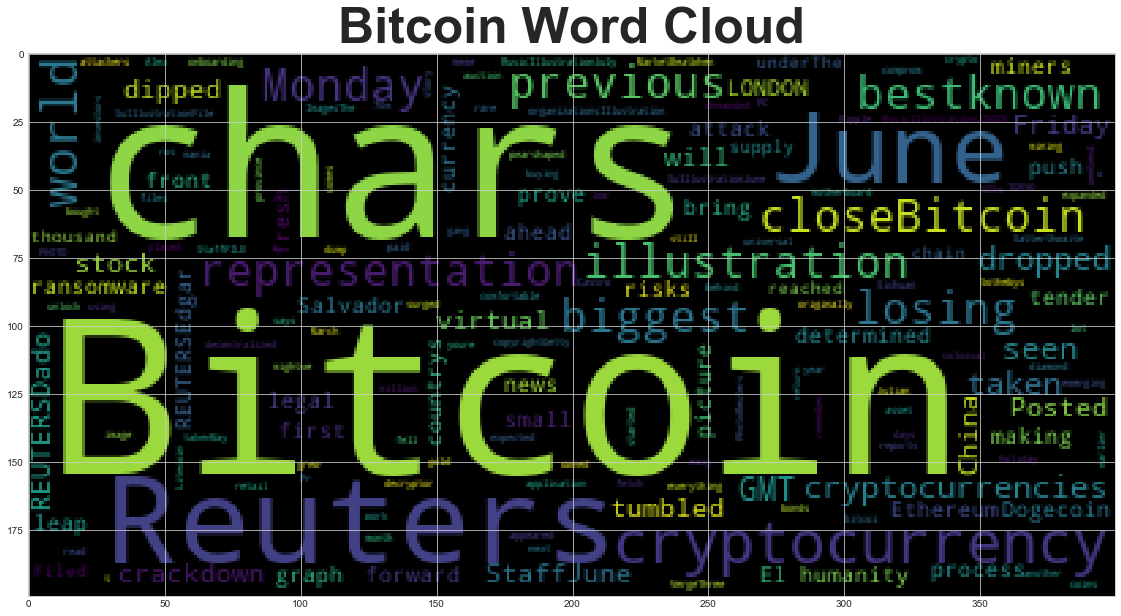

In [31]:
wc = WordCloud(collocations=False).generate(' '.join(btc_tokens))
plt.imshow(wc)
plt.title(label='Bitcoin Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

Text(0.5, 1.0, 'Ethereum Word Cloud')

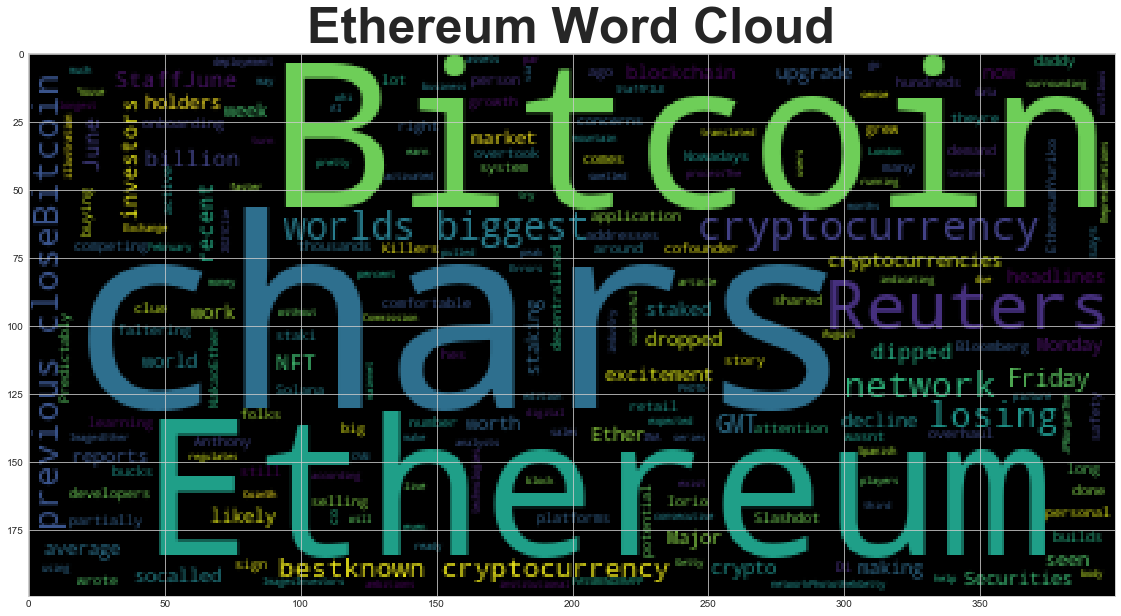

In [32]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_tokens))
plt.imshow(wc)
plt.title(label='Ethereum Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [33]:
import spacy
from spacy import displacy
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en


2021-07-18 21:54:58.609253: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-07-18 21:54:58.609348: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [34]:
# # Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [38]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [39]:
# Concatenate all of the Bitcoin text together
btc_content = ' '.join(btc_df['text'])

In [40]:
# Run the NER processor on all of the text
doc= nlp(btc_content)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [41]:
# Render the visualization
displacy.render(doc, style='ent')

In [42]:
# List all Entities

for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Alex Castro PERSON
Verge ORG
Three days DATE
the holiday weekend DATE
$70m MONEY
£50.5m MONEY
Bitcoin PERSON
Bitcoin and Ethereum ORG
2021 DATE
LONDON GPE
June 23 DATE
Reuters ORG
El Salvador GPE
LONDON GPE
June 23 DATE
Reuters ORG
El Salvador GPE
Pr PERSON
earlier this year DATE
Dogecoin GPE
Bitcoin PERSON
March 15, 2021 DATE
Dado Ruvic PERSON
June 30 DATE
Reuters ORG
June 21 DATE
Reuters ORG
Monday DATE
China GPE
Sichuan GPE
Bitcoin PERSON
as low as $32,288 MONEY
first ORDINAL
Bitcoin PERSON
June 14, 2021 DATE
Edgar Su PERSON
Reuters ORG
7.37% PERCENT
32,094.44 MONEY
Bitcoin PERSON
Monday DATE
China GPE
June 21 DATE
Reuters ORG
8.57% PERCENT
32,540.35 MONEY
2011 DATE
GMT ORG
Monday DATE
3,049.42 MONEY
Bitcoin PERSON
49.9% PERCENT
Reuters ORG
June 21 DATE
Reuters ORG
8.57% PERCENT
32,540.35 MONEY
2011 DATE
GMT ORG
Monday DATE
3,049.42 MONEY
Bitcoin PERSON
Reuters ORG
Bitcoin ORG
June 7, 2021 DATE
Edgar Su/Illustration/File Photo
 PERSON
Reuters ORG
Reuters ORG
June 25 DATE
Reuters ORG

---

### Ethereum NER

In [45]:
# Concatenate all of the Ethereum text together
eth_content = ' '.join(eth_df['text'])

In [46]:
# Run the NER processor on all of the text
doc= nlp(eth_content)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [47]:
# Render the visualization
displacy.render(doc, style='ent')

In [48]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Ethereum ORG
Ethereum Killers WORK_OF_ART
Solana PERSON
Bitcoin and Ethereum ORG
2021 DATE
NFT ORG
hundreds of thousands CARDINAL
Yuriko Nakao PERSON
Friday DATE
Anthony Di Iorio PERSON
Ethereum ORG
Bloomberg PERSON
Slashdot ORG
more than $13 billion MONEY
2.0 CARDINAL
Photothek/Getty Images PERSON
more than $13 billion MONEY
2.0 CARDINAL
$40 billion MONEY
2025 DATE
JPMorgan ORG
NFT ORG
as much as CARDINAL
90 percent PERCENT
recent weeks DATE
recent months DATE
Spanish NORP
AI ORG
The Securities and Exchange Commission ORG
London GPE
Ethereum ORG
12 965 CARDINAL
between August 3-5, 2021 DATE
Clie PERSON
Getty Images
Investors ORG
the third week DATE
February 2018 DATE
Reuters ORG
June 25 DATE
Reuters ORG
7.37% PERCENT
32,094.44 MONEY
Friday DATE
2,554.88 MONEY
Bitcoin PERSON
50.5 CARDINAL
Reuters ORG
June 25 DATE
Reuters ORG
8.51% PERCENT
31,699.83 MONEY
22:04 CARDINAL
GMT ORG
Friday DATE
2,937.27 MONEY
Bitcoin PERSON
June 21 DATE
Reuters ORG
8.57% PERCENT
32,540.35 MONEY
2011 DATE
GMT

---